# what's your hourse price value?
** overfitting alert **


## Reading data and exploring its quality (Data cleaning)

In [62]:
df=pd.read_csv("full_house_data.csv")
pd.set_option('display.max_columns', 21)
df.head()
#data size: 4.78 MB 
#it contains 34857 rows and 21 columns : df.shape()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [9]:
#check if the data contain any missing values
df.isna().any().any()

True

In [10]:
#check the missing values in total
df.isna().sum().sum()


100975

In [16]:
34857/100975*21
# 7.24 % of our data are missing values let's check them by columns

7.249289428076256

In [15]:
#checking missing values by columns:
df.isna().sum().sort_values(ascending=False)

BuildingArea     21115
YearBuilt        19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Longtitude        7976
Lattitude         7976
Price             7610
Regionname           3
Propertycount        3
CouncilArea          3
Postcode             1
Distance             1
Date                 0
SellerG              0
Method               0
Type                 0
Rooms                0
Address              0
Suburb               0
dtype: int64

In [17]:
21115/100975
# 20% of buildingarea column is missing values

0.20911116613023026

In [19]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [193]:
data=df.copy()
#a good practice to save the original dataset

In [194]:
data.describe()
#you can also detect some missing value with the count function
# we notice also some outliers 

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [195]:
#add the agecolumn of house from YearBuilt column , I think it could be useful when predicting the price
import datetime
today = datetime.datetime.today()
data['Age']=today.year-data['YearBuilt']
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,120.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,120.0


In [196]:
#drop the unuseful column for our case statement:
data.drop(['Address','Date','Longtitude','Lattitude','YearBuilt','Postcode'],axis=1,inplace=True)

data

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount,Age
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0,NaN
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0,NaN
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0,120.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0,NaN
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,4,h,1480000.0,PI,Jas,6.3,4.0,1.0,3.0,593.0,NaN,Maribyrnong City Council,Western Metropolitan,6543.0,NaN
34853,Yarraville,2,h,888000.0,SP,Sweeney,6.3,2.0,2.0,1.0,98.0,104.0,Maribyrnong City Council,Western Metropolitan,6543.0,2.0
34854,Yarraville,2,t,705000.0,S,Jas,6.3,2.0,1.0,2.0,220.0,120.0,Maribyrnong City Council,Western Metropolitan,6543.0,20.0
34855,Yarraville,3,h,1140000.0,SP,hockingstuart,6.3,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,Western Metropolitan,6543.0,NaN


In [173]:
#we will check again the missing values
data.isna().sum().sort_values(ascending=False)

BuildingArea     21115
Age              19306
Landsize         11810
Car               8728
Bathroom          8226
Bedroom2          8217
Price             7610
Propertycount        3
Regionname           3
CouncilArea          3
Distance             1
SellerG              0
Method               0
Type                 0
Rooms                0
Suburb               0
dtype: int64

In [197]:
# we can fill those columns with 0, which will means the abscence of those features 
data.fillna({'Propertycount':'0', 'Distance':'0','Bedroom2':'0','Bathroom':'0','Car':'0'}, inplace=True)
#impute continuous variables with mean/median to redce overfitting
data['BuildingArea'] = data['BuildingArea'].fillna(data.BuildingArea.mean())
data['Age'] = data['Age'].fillna(data.Age.mean())
# or we can do imputation for age column using the code:
#from sklearn.impute import SimpleImputer
#data['Age'] = SimpleImputer().fit_transform('Age')
data['Landsize'] = data['Landsize'].fillna(data.Landsize.mean())
#drop price missing values since it's our predictive varibles
data = data[data['Price'].notna()]
data.isna().sum().sort_values(ascending=False)

Regionname       3
CouncilArea      3
Age              0
Propertycount    0
BuildingArea     0
Landsize         0
Car              0
Bathroom         0
Bedroom2         0
Distance         0
SellerG          0
Method           0
Price            0
Type             0
Rooms            0
Suburb           0
dtype: int64

In [198]:
data.dropna(inplace=True)


C:\Users\kaout\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [199]:
data.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Distance          object
Bedroom2          object
Bathroom          object
Car               object
Landsize         float64
BuildingArea     float64
CouncilArea       object
Regionname        object
Propertycount     object
Age              float64
dtype: object

In [200]:
# data type conversion
data['Propertycount']=data['Propertycount'].astype('int64')
data['Age']=data['Age'].astype('int64')
data['Car']=data['Car'].astype('int64')
data['Distance']=data['Distance'].astype('float64')
data['Bedroom2']=data['Bedroom2'].astype('int64')
data['Bathroom']=data['Bathroom'].astype('int64')

C:\Users\kaout\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kaout\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kaout\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [201]:
df1=data.copy()
#a good practice also to save a copy

In [182]:
data = pd.get_dummies(data, drop_first=True)
data

<IPython.core.display.Javascript object>

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Age,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.0,2,1,1,202.000000,160.2564,4019,54,...,0,1,0,0,1,0,0,0,0,0
2,2,1035000.0,2.0,2,1,0,156.000000,79.0000,4019,120,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.0,3,2,0,134.000000,150.0000,4019,120,...,0,1,0,0,1,0,0,0,0,0
5,3,850000.0,2.0,3,2,1,94.000000,160.2564,4019,54,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.0,3,1,2,120.000000,142.0000,4019,6,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.0,4,1,3,593.000000,160.2564,6543,54,...,0,0,0,0,0,0,0,0,1,0
34853,2,888000.0,6.0,2,2,1,98.000000,104.0000,6543,2,...,0,0,0,0,0,0,0,0,1,0
34854,2,705000.0,6.0,2,1,2,220.000000,120.0000,6543,20,...,0,0,0,0,0,0,0,0,1,0
34855,3,1140000.0,6.0,0,0,0,593.598993,160.2564,6543,54,...,0,0,0,0,0,0,0,0,1,0


In [183]:
from sklearn import preprocessing
X = data.drop('Price', axis=1)
y = data['Price']

In [184]:

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)


In [185]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
linear_reg=regressor.fit(train_X, train_y)
print(linear_reg.score(test_X, test_y))


0.09453728494045277


In [186]:
linear_reg.score(train_X, train_y)
#overfitting: the model performed kind of well on train data but not on test data

0.6857199909816848

In [187]:
from sklearn.compose import TransformedTargetRegressor

lr = TransformedTargetRegressor(
        regressor=regressor, 
        func=np.log, inverse_func=np.exp)

lr.fit(train_X,train_y)
print(lr.score(test_X,test_y))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7196213205077895


In [188]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)
print(lasso_reg.score(test_X, test_y))

0.6597537561779871


C:\Users\kaout\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1316536105957556.0, tolerance: 796258688308222.5
  positive)


In [189]:
lasso_reg.score(train_X, train_y)


0.6797467804511648

In [190]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)
ridge_reg.score(test_X, test_y)


0.6704557965733613

In [191]:
ridge_reg.score(train_X, train_y)


0.6655690645004628

<IPython.core.display.Javascript object>

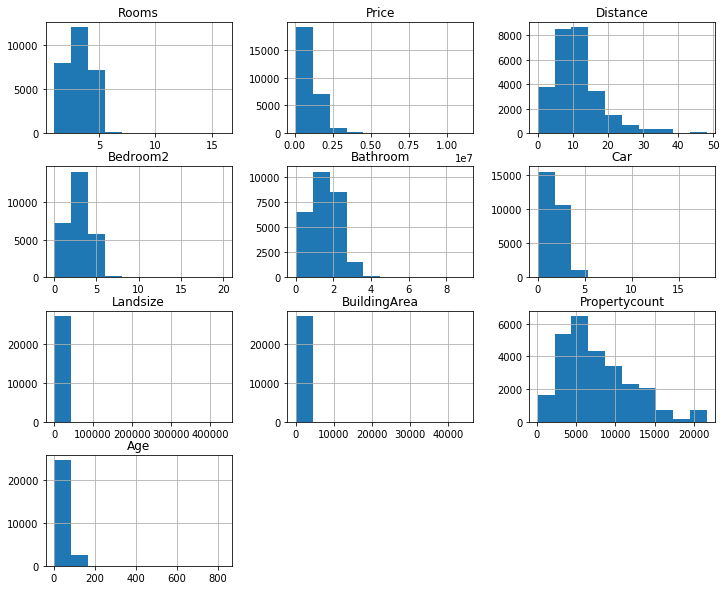

In [202]:
#some data visualization to see the features distributions
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 10)
df1.hist()
plt.show()

<IPython.core.display.Javascript object>

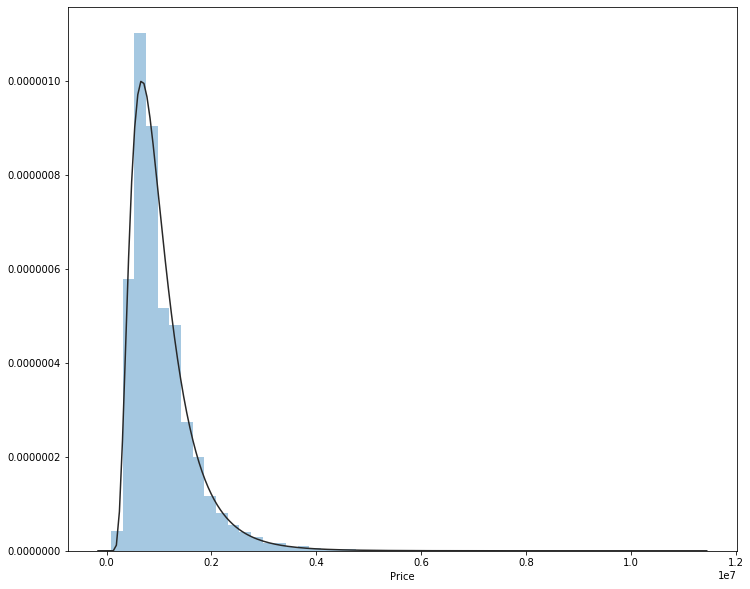

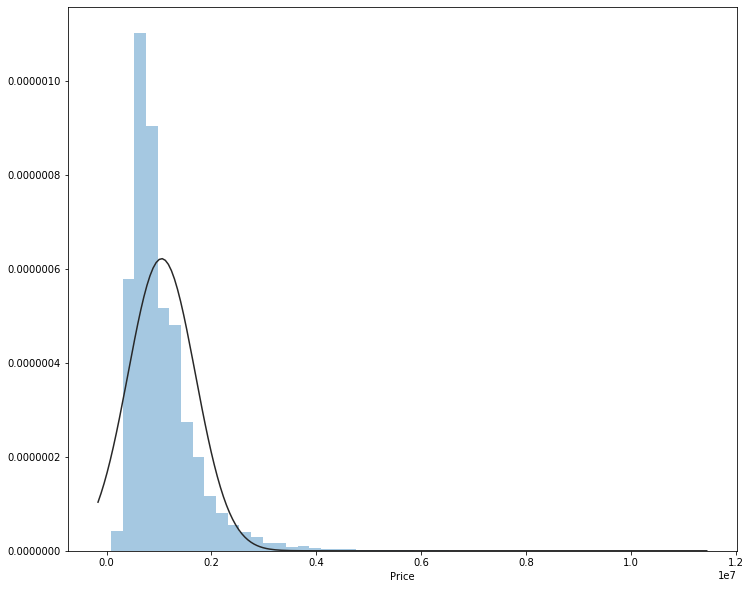

In [203]:
import seaborn as sns
import scipy.stats as st
#log normal
sns.distplot(df1.Price, kde=False, fit=st.lognorm)
plt.show()
#Normal
sns.distplot(df1.Price, kde=False, fit=st.norm)

#### from skewness to normal distributions

In [204]:
from scipy.stats import skew

#log transform the target:
df1["Price"] = np.log1p(df1["Price"])

#log transform skewed numeric features:
numeric_feats = df1.dtypes[df1.dtypes != "object"].index

skewed_feats = df1[numeric_feats].apply(lambda x: skew(x.dropna())) 
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
#compute skewness
df1[skewed_feats] = np.log1p(df1[skewed_feats])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

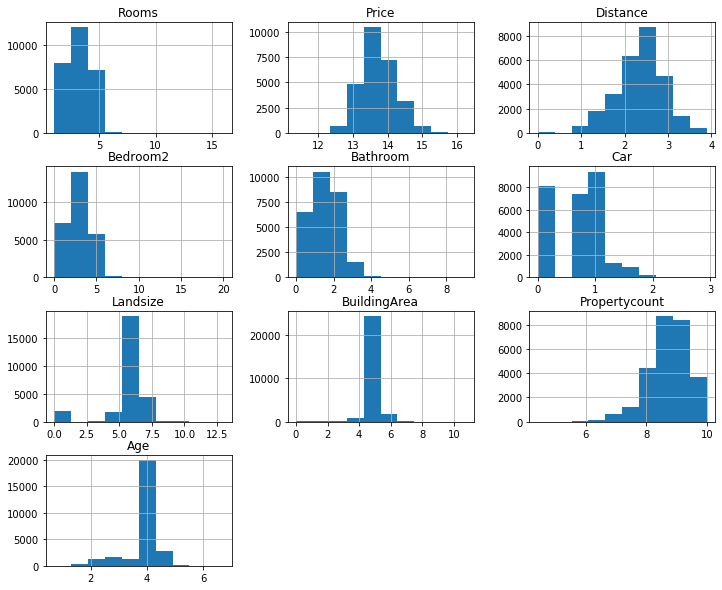

In [205]:
df1.hist()
plt.show()